피드 포워드 신경망은 입력의 길이가 고정되어 있어 자연어 처리를 위한 신경망으로는 한계가 있었습니다. 결국 다양한 길이의 입력 시퀀스를 처리할 수 있는 인공 신경망이 필요하게 되었는데, 자연어 처리에 대표적으로 사용되는 인공 신경망이 바로 순환 신경망(Recurrent Neural Network, RNN)입니다. 이번 챕터에서는 가장 기본적인 순환 신경망인 바닐라 RNN, 이를 개선한 LSTM, GRU에 대해서 학습해봅시다. LSTM과 GRU를 이해한다면 텍스트 분류나 기계 번역과 같은 다양한 자연어 처리 문제들을 풀 수 있습니다.

# 1. 순환신경망(RNN)

앞서 배운 신경망들은 전부 은닉층에서 활성화 함수를 지난 값은 오직 출력층 방향으로만 향했습니다. 이와 같은 신경망들을 피드 포워드 신경망(Feed Forward Neural Network)이라고 합니다. 그런데 그렇지 않은 신경망들이 있습니다. RNN(Recurrent Neural Network) 또한 그 중 하나입니다. RNN은 은닉층의 노드에서 활성화 함수를 통해 나온 결과값을 출력층 방향으로도 보내면서, 다시 은닉층 노드의 다음 계산의 입력으로 보내는 특징을 갖고있습니다.

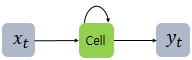

x는 입력층의 입력 벡터,y는 출력층의 출력 벡터입니다. 실제로는 편향b 도 입력으로 존재할 수 있지만 앞으로의 그림에서는 생략합니다. RNN에서 은닉층에서 활성화 함수를 통해 결과를 내보내는 역할을 하는 노드를 셀(cell)이라고 합니다. 이 셀은 이전의 값을 기억하려고 하는 일종의 메모리 역할을 수행하므로 이를 메모리 셀 또는 RNN 셀이라고 표현합니다.

메모리 셀이 출력층 방향 또는 다음 시점인 t+1의 자신에게 보내는 값을 은닉 상태(hidden state) 라고 합니다. 다시 말해 t 시점의 메모리 셀은 t-1 시점의 메모리 셀이 보낸 은닉 상태값을 t 시점의 은닉 상태 계산을 위한 입력값으로 사용합니다.

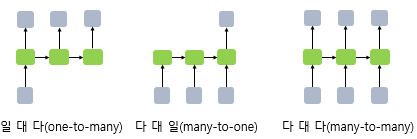

RNN은 입력과 출력의 길이를 다르게 설계 할 수 있으므로 다양한 용도로 사용할 수 있습니다. 위 그림은 입력과 출력의 길이에 따라서 달라지는 RNN의 다양한 형태를 보여줍니다. 위 구조가 자연어 처리에서 어떻게 사용될 수 있는지 예를 들어봅시다. RNN 셀의 각 시점의 입, 출력의 단위는 사용자가 정의하기 나름이지만 가장 보편적인 단위는 '단어 벡터'입니다.

- 일대다

 하나의 입력에 대해서 여러개의 출력을 의미하는 일 대 다(one-to-many) 구조의 모델은 하나의 이미지 입력에 대해서 사진의 제목을 출력하는 이미지 캡셔닝(Image Captioning) 작업에 사용할 수 있습니다. 사진의 제목은 단어들의 나열이므로 시퀀스 출력입니다.

- 다대일

 단어 시퀀스에 대해서 하나의 출력을 하는 다 대 일(many-to-one) 구조의 모델은 입력 문서가 긍정적인지 부정적인지를 판별하는 감성 분류(sentiment classification), 또는 메일이 정상 메일인지 스팸 메일인지 판별하는 스팸 메일 분류(spam detection) 등에 사용할 수 있습니다. 위 그림은 RNN으로 스팸 메일을 분류할 때의 아키텍처를 보여줍니다. 이러한 예제들은 'RNN을 이용한 텍스트 분류' 챕터에서 배웁니다.

- 다대다
 
 다 대 다(many-to-many) 구조의 모델의 경우에는 사용자가 문장을 입력하면 대답 문장을 출력하는 챗봇과 입력 문장으로부터 번역된 문장을 출력하는 번역기, 또는 '태깅 작업' 챕터에서 배우는 개체명 인식이나 품사 태깅과 같은 작업이 속합니다. 위 그림은 개체명 인식을 수행할 때의 RNN 아키텍처를 보여줍니다.

https://wikidocs.net/22886

# 2.케라스로 RNN 구현



케라스로 RNN층을 추가하는 코드는 다음과 같다. 

In [ ]:
from tensorflow.keras.layers import SimpleRNN

model.add(SimpleRNN(hidden_units))

In [ ]:
#인자를 사용할 때를 보겠다.
model.add(SimpleRNN(hidden_units,input_shape=(timesteps,input_dim)))

#다른 표기
model.add(SimpleRNN(hidden_units,input_length=M,input_dim=N))

- hidden_units = 은닉 상태의 크기를 정의. 메모리 셀이 다음 시점의 메모리 셀과 출력층으로 보내는 값의 크기(output_dim)와도 동일. RNN의 용량(capacity)을 늘린다고 보면 되며, 중소형 모델의 경우 보통 128, 256, 512, 1024 등의 값을 가진다.
- timesteps = 입력 시퀀스의 길이(input_length)라고 표현하기도 함. 시점의 수.
- input_dim = 입력의 크기.

RNN층은 (batch_size,timesteps,input_dim)크기의 3D 텐서를 입력으로 받는다. batch_size는 한번에 학습하는 데이터의 개수를 말한다. 


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN

model=Sequential()
model.add(SimpleRNN(3,input_shape=(2,10)))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_3 (SimpleRNN)    (None, 3)                 42        
                                                                 
Total params: 42
Trainable params: 42
Non-trainable params: 0
_________________________________________________________________


출력값이 (batch_size, output_dim) 크기의 2D 텐서일 때, output_dim은 hidden_units의 값인 3입니다. 이 경우 batch_size를 현 단계에서는 알 수 없으므로 (None, 3)이 됩니다. 이번에는 batch_size를 미리 정의해보겠습니다.

In [ ]:
model=Sequential()
model.add(SimpleRNN(3,batch_input_shape=(8,2,10)))
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_4 (SimpleRNN)    (8, 3)                    42        
                                                                 
Total params: 42
Trainable params: 42
Non-trainable params: 0
_________________________________________________________________


batch_size를 8로 기재하면 출력의 크기가 (8, 3)이 됩니다. return_sequences 매개 변수에 True를 기재하여 출력값으로 (batch_size, timesteps, output_dim) 크기의 3D 텐서를 리턴하도록 모델을 만들어 보겠습니다.

In [ ]:
model=Sequential()
model.add(SimpleRNN(3,batch_input_shape=(8,2,10),return_sequences=True))
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_5 (SimpleRNN)    (8, 2, 3)                 42        
                                                                 
Total params: 42
Trainable params: 42
Non-trainable params: 0
_________________________________________________________________


출력의 크기가 (8, 2, 3)이 됩니다.

# 4. 깊은 순환 신경망(Deep Recurrent Neural Network) 

RNN도 다수의 은닉층을 가질 수 있다. 
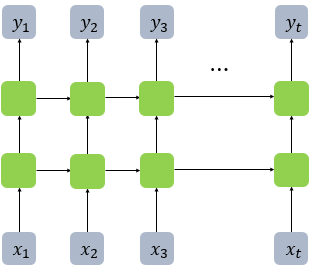

In [ ]:
model=Sequential()
model.add(SimpleRNN(hidden_units,input_length=10,input_dim=5,return_sequences=True))
model.add(SimpleRNN(hidden_units,return_sequences=True))

## 5. 양방향 순환 신경망(Bidirectional Recurrent Neural Network)



```
운동을 열심히 하는 것은 [        ]을 늘리는데 효과적이다.

1) 근육
2) 지방
3) 스트레스
```



운동을 열심히 하는 것은 [ ]을 늘리는데 효과적이다.' 라는 문장에서 문맥 상으로 정답은 '근육'입니다. 위의 빈 칸 채우기 문제를 풀 때 이전에 나온 단어들만으로 빈 칸을 채우려고 시도해보면 정보가 부족합니다. '운동을 열심히 하는 것은' 까지만 주고 뒤의 단어들은 가린 채 빈 칸의 정답이 될 수 있는 세 개의 선택지 중 고르는 것은 뒤의 단어들까지 알고있는 상태보다 명백히 정답을 결정하기가 어렵습니다.

RNN이 풀고자 하는 문제 중에서는 과거 시점의 입력 뿐만 아니라 미래 시점의 입력에 힌트가 있는 경우도 많습니다. 그래서 이전과 이후의 시점 모두를 고려해서 현재 시점의 예측을 더욱 정확하게 할 수 있도록 고안된 것이 양방향 RNN입니다.

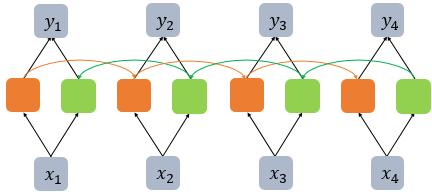

양방향 RNN은 하나의 출력값을 예측하기 위해 기본적으로 두 개의 메모리 셀을 사용합니다. 첫번째 메모리 셀은 앞에서 배운 것처럼 앞 시점의 은닉 상태(Forward States) 를 전달받아 현재의 은닉 상태를 계산합니다. 위의 그림에서는 주황색 메모리 셀에 해당됩니다. 두번째 메모리 셀은 앞에서 배운 것과는 다릅니다. 앞 시점의 은닉 상태가 아니라 뒤 시점의 은닉 상태(Backward States) 를 전달 받아 현재의 은닉 상태를 계산합니다. 입력 시퀀스를 반대 방향으로 읽는 것입니다. 위의 그림에서는 초록색 메모리 셀에 해당됩니다. 그리고 이 두 개의 값 모두가 현재 시점의 출력층에서 출력값을 예측하기 위해 사용됩니다.

In [ ]:
from tensorflow.keras.models import Bidirectional

timesteps=10
input_dim=5

model=Sequential()
model.add(Bidirectional(SimpleRNN(hidden_units,return_sequences=True),input_shape=(timesteps,input_dim)))

양방향 RNN도 다수의 은닉층을 가질 수 있다. 아래의 그림은 양방향 순환신경망에서 은닉층이 1개 더 추가되어 은닉층이 2개인 깊은 양방향 순환 신경망의 모습을 보여준다.

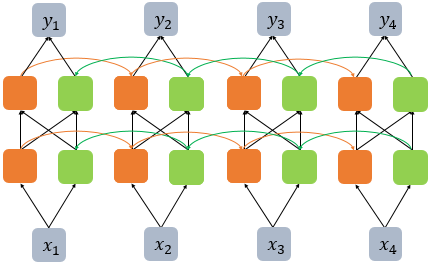

In [ ]:
model=Sequential()
model.add(Bidirectional(SimpleRNN(hidden_units,return_sequences=True),input_shape=(timesteps,input_dim)))
model.add(Bidirectional(SimpleRNN(hidden_units,return_sequences=True)))
model.add(Bidirectional(SimpleRNN(hidden_units,return_sequences=True)))